# BabyRobot Animation

This notebook shows how to create and save animations of BabyRobot moving through a grid level.

Additionally it has examples of other animations, such as showing how the state values change during Policy Evaluation.

In [2]:
import gymnasium
print(f"Gym Version = {gymnasium.__version__}")

import babyrobot
print(f"Baby Robot Version = {babyrobot.__version__}")

Gym Version = 0.27.0
Baby Robot Version = 1.0.24


In [3]:
import numpy as np
from time import sleep

from babyrobot.lib import Animate
from babyrobot.lib import Policy
from babyrobot.lib import PolicyEvaluation
from IPython.display import Image as PyImage

## Basic Animation

This can be performed using the standard Reinforcement Learning loop.

In the example below Baby Robot will follow a stochastic (random) policy until he reaches the exit:

In [4]:
# create and display a default environment
env = babyrobot.make("BabyRobot-v0")
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)

In [5]:
# initialize the environment
env.reset()

# move until the exit is found
terminated = False
while not terminated:  

  # choose a random action
  action = env.action_space.sample()   

  # take the action and get the information from the environment
  new_state, reward, terminated, truncated, info = env.step(action)
  
  # show the current position
  env.render() 

# Using the Animation class

The animation class allows a Policy or Policy Evaluation to be animated.
Additionally it allows the episode to be saved as an animated gif movie for later playback.

## Animating a Policy

In the example below, a simple default environment is created and then Baby Robot follows a stochastic policy where all possible actions in a state are equally likely to be chosen.

__max_steps__: <br>
The '__args__' object is used to pass the maximum number of steps to the '__show_policy__' function using the '__max_steps__' keyword.

In [6]:
# create an environment with a stochastic policy
env = babyrobot.make("BabyRobot-v0")
policy = Policy(env)

# limit the episode to a maximum of 10 steps
args = { 'max_steps': 10 }
animate = Animate(env)
animate.show_policy(policy,**args)

## Creating a Movie

To create a movie a set of images need to be created at each step of the episode animation. Image generation is turned on by setting the '__create_images__' key-word argument to True:

```
args = { 'create_images': True }
```

One thing to note is that the episode will run more slowly when a images are being written. This is necessary to allow time for each individual image to be saved and, to create a smooth movie, several images need to be saved as Baby Robot moves between states.


'__image_folder__':<br>

By default images will be written to a folder called "animate_images" but this can be changed using the '__image_folder__' argument:

```
args['image_folder'] = 'my_image_folder'
```


'__interval__':<br>
The time between each frame of the animation can be set using the '__interval__' parameter. When an animation is being run this has a value of 80 or when images are being generated its default value is 300 (for Policy Evaluation this is 3000). If you experience any problems with image generation you can try increasing this value.

In [7]:
# create an environment with a stochastic policy
env = babyrobot.make("BabyRobot-v0")
policy = Policy(env)

# limit the episode to a maximum of 10 steps and create images during these steps
args = { 'max_steps': 10, 'create_images': True, 'interval': 400 }
animate = Animate(env)
animate.show_policy(policy,**args)

If you now take a look in the image folder you should see the set of images that have been generated over the course of the run.

These can now be combined to create a movie.

__movie_name__:<br>
The movie is created as an animated gif and therefore the supplied movie name should have this extension.


__clear_images__:<br>
By default once the movie has been made the generated images will be cleared. Setting the '__clear_images__' parameter to False allows the images to not be deleted. They can then be re-used to try different configurations of the movie creation (e.g. changing the playback speed or reducing the number of steps displayed).

Creating the movie: policy.gif (duration = 0.08, steps = 160) - Complete


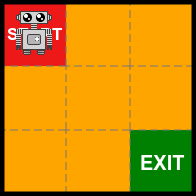

In [8]:
# create a movie from the generated images
# - by default the images will be deleted when the movie is made
# - set "'clear_images': False" to stop them being deleted
movie_name = "policy.gif"
args = {'movie_name': movie_name, 'clear_images': False }
animate.create_movie(**args)

# show the movie
PyImage(filename=movie_name)

__duration__:<br>
When a policy is being animated the default time between each frame is 0.08 seconds (as shown in the movie above). This can be changed using the '__duration__' parameter.


__movie_frames__:<br>
The number of frames in the movie can be reduced using the '__movie_frames__' parameter by specifying a value less than the total number of frames that were generated during the episode (it cannot be increased, since the images don't exist!).

In policy animation there are 16 frames generated when moving between one state and the next. Therefore, if you only wanted to see Baby Robot moving over 2 states you'd set the number of frames to 32.

Creating the movie: policy_6states.gif (duration = 0.04, steps = 96) - Complete


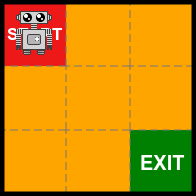

In [9]:
# create a shorter movie with more time between each frame
# - display 6 states = 96 frames (= 16x6)
# - set the time between each frame to be 0.04 seconds (double the default speed)
movie_name = "policy_6states.gif"
args = { 'movie_frames': 96, 'clear_images': False }
args['movie_name'] = movie_name
args['duration'] = 0.04
animate.create_movie(**args)

# show the movie
PyImage(filename=movie_name) 

__clear_image_folder__:<br>
If the '__clear_images__' parameter was used to retain the images at the end of movie creation, these can then be removed using the '__clear_image_folder__' helper function.

In [10]:
# delete the images generated during the animation
animate.clear_image_folder()

## Show information about the episode

A side panel can be added that allows information about the episode to be displayed (see the _[BabyRobot API notebook](https://github.com/WhatIThinkAbout/BabyRobotGym/blob/main/notebooks/BabyRobot_API.ipynb)_ for more information on side panels).


__show_info__: <br>
By setting the '__show_info__' keyword to True default information will be displayed as the episode progresses. Note that a side panel must be added when the environment is created.

In [11]:
# add a side-panel to the environment
setup = {'side_panel':{'width':160}}
env = babyrobot.make("BabyRobot-v0",**setup)
policy = Policy(env)

args = { 'max_steps': 10 }
args['show_info'] = True   # display default information about the episode
animate = Animate(env)
animate.show_policy(policy,**args)

## Displaying custom episode information

__info_function__:<br>
The information written to the side panel can be customised using the 'info_function' keyword to supply a callback function. This function takes a '__details__' parameter supplies information about the current state and which has the following keys:


  * 'state': the current state (an [x,y] co-ordinate)
  * 'action': the action chosen in the current state
  * 'reward': the amount of reward received for taking the action
  * 'new_state': the co-ordinates of the new state
  * 'total_reward': the total amount of reward recieved for the episode
  * 'done': set true when the episode terminates
  * 'truncated': set true if the episode is truncated
  * 'info': extra information about the episode
  * 'step': the current step that has just been taken  
  * 'direction': the actual direction moved     

As a simple example the function below just writes out the current step value. 
* It receives the 'details' parameter and then uses the 'step' property of this to create a string.
* This string is added to an array of items to be written and given the coordinates of where it should appear in the information panel.
* Finally an 'info' object is created that takes this array as the value of its 'side_info' key.

```
def get_info_string( details ):
  info = {'side_info': [((10,10),f"step: {details['step']}")]}
  return info
```

This function can then be supplied as the value of the 'info_function' key, given as part of the 'show_policy' args:

```
args = {'info_function': get_info_string }
animate.show_policy(policy,**args)
```

The complete example is shown below:

In [12]:
def get_info_string( details ):    
  info = {'side_info': [((10,10),f"step: {details['step']}")]}
  return info 

setup = {'side_panel': {'width':160}}
env = babyrobot.make("BabyRobot-v0",**setup)
policy = Policy(env)

animate = Animate(env)
args = {'max_steps': 8, 'info_function': get_info_string }
animate.show_policy(policy,**args)

A more complex example of the 'info_function' is shown below. This uses a few more of the 'details' parameters and creates an environment with a deterministic policy. The action to be taken in each state is displayed as an overlay on the grid. 

Additionally the episode is captured as a movie (so will run a bit slower) that is displayed at the end.

In [13]:
# helper function to display text information in the side panel
def get_info_string( details ):
  info = {}
  info['side_info'] = \
  [
    ((14,110),f"step: {details['step']}"),
    ((14,130),f"action: {details['action']}"),
    ((14,150),f"new state: {details['new_state']}"),
    ((14,170),f"total reward: {details['total_reward']}"),
  ]
  return info

In [14]:
# create an environment and define a deterministic policy
# (i.e. a specific action is specified for each state)
# - generate images during the run for movie creation
# (note this will make the episode run more slowly)
setup = {'show_start_text':False,'add_compass':True }
setup['side_panel'] = {'width':160}
env = babyrobot.make("BabyRobot-v0",**setup)
directions = np.array([[4, 2, 4],
                       [4, 1, 4],
                       [2, 1, 0]])
policy = Policy(env,directions)

info = {'directions': {'arrows':directions,'text':directions}}
env.show_info(info) 

args = { 'max_steps': 8 }
args['info_function'] = get_info_string
args['create_images'] = True
animate = Animate(env)
animate.show_policy(policy,**args)

Creating the movie: deterministic_policy.gif (duration = 0.08, steps = 128) - Complete


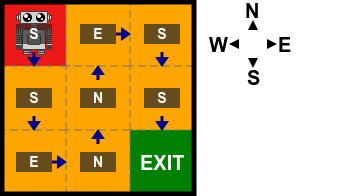

In [15]:
# create a movie from the generated images
# - by default the images will be deleted when the movie is made
movie_name = 'deterministic_policy.gif'
args = {'movie_name': movie_name}
animate.create_movie(**args)

# show the movie
PyImage(filename=movie_name) 

## Writing to the bottom panel

If you'd instead like to write information about the episode below the grid then use the '__bottom_info__' key in the information structure created in the callback function.

This also requires a '__bottom_panel__' to be defined when the environment is created.

In [16]:
# helper function to display text information in the bottom panel
def get_info_string( details ):    
  info = {}
  info['bottom_info'] = \
  [
    ((20,10),f"step: {details['step']}"),    
    ((20,30),f"action: {details['action']}"),
    ((160,10),f"new state: {details['new_state']}"),                    
    ((160,30),f"total reward: {details['total_reward']}"),        
  ]    
  return info 

In [17]:
# create an environment with a bottom information panel
setup = {'show_start_text':False,'add_compass':True }
setup['bottom_panel'] = {'width':396,'height':50,'color':'green','text_fg':'blue'}
env = babyrobot.make("BabyRobot-v0",**setup)

info = {'directions': {'arrows':directions,'text':directions}}
env.show_info(info) 

args = { 'max_steps': 8 }
args['info_function'] = get_info_string
animate = Animate(env)
animate.show_policy(policy,**args)

# Policy Evaluation Animation

In __[Policy Evaluation](https://medium.com/towards-data-science/state-values-and-policy-evaluation-ceefdd8c2369)__ a value is calculated for each state, that shows how good it is to be in that particular state. 

In this simple grid world this is really just a measure of how far Baby Robot is from the exit and represents the average number of steps it should take him to reach it.

In the example below, we create a default grid environment and use a stochastic (random) policy to navigate this.

The environment and policy are both given to a __PolicyEvaluation__ class that calculates the value of each state. 

Initially each state value is set to zero. Then a set of sweeps over all states is performed, using the Bellman equation to iteratively update this value, until it finally converges to the actual state value.

In [18]:
# create a blank, default environment
setup = {'show_start_text':False,'show_end_text':False,'robot':{ 'show': False}}
env = babyrobot.make("BabyRobot-v0",**setup)

In [19]:
# create a stochastic policy and a policy evaluation object for this policy
policy = Policy(env)
policy_evaluation = PolicyEvaluation( env, policy )

In [20]:
# show the initial state values
info = {'text': policy_evaluation.end_values}
env.show_info(info)
env.render()

MultiCanvas(height=196, image_data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xc4\x00\x00\x00\xc4\x08\x…

We can run a single iteration of Policy Evaluation to see how the state values change. Additionally, we can act greedily with respect to these values to update our policy (so instead of just choosing an action at random, we can choose one that takes us to a state with the highest state value). The actions can be displayed by setting the 'directions' info parameter (see the _[API notebook](https://github.com/WhatIThinkAbout/BabyRobotGym/blob/main/notebooks/BabyRobot_API.ipynb)_ for more details).

In [21]:
# do a single policy evaluation update
policy_evaluation.do_iteration()
directions = policy.calculate_greedy_directions(policy_evaluation.end_values)

# show the initial state values
info = {'text': policy_evaluation.end_values, 'precision': 3}
info['directions'] = {'arrows':directions}
env = babyrobot.make("BabyRobot-v0",**setup)
env.show_info(info)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)

When greedy actions are selected from a state the action chosen will be the one that would move Baby Robot to the neighbouring state that has the largest current state value (which in this case means the least negative).

When multiple neighbouring states have the same value then the policy, created by choosing greedily, will make all of these actions equally possible.

So, after a single iteration of Policy Evaluation, the two states next to the exit will have their action set to move to the exit since its state value is zero which is greater than the -1 of the other neighbouring states. The other states will have multiple actions since the currently calculated state values, other than the exit (which by definition always has a value of 0), all have values of -1.

### Running Policy Evaluation to Convergence

In [22]:
# run policy evaluation to convergence
steps_to_convergence = policy_evaluation.run_to_convergence(max_iterations = 300)
print(f"Convergence in {steps_to_convergence} iterations")

# show the final state values after convergence
env = babyrobot.make("BabyRobot-v0",**setup)
info = {'text': policy_evaluation.end_values, 'precision': 0}
env.show_info(info) 
env.render()

Convergence in 102 iterations


MultiCanvas(height=196, sync_image_data=True, width=196)

For this environment and policy the state values converge after 104 iterations to the values shown above (note these are rounded to the nearest integer due to '__precision__' being set to zero).

Each of these values represents the average number of moves Baby Robot would need to take to reach the exit (he is given a reward of -1 for each step that he takes). 

So, for example, in either of the states that are next to the exit, on average he'd still need to take 11 steps before actually finding the exit. This is due to him following a random policy.

### Animating Policy Evaluation

The state values at each iteration of Policy Evaluation can be animated by simply displaying them on the grid after each update.

The simple example from above is repeated with a simple loop to show this update (note in this case the state values are displayed to one decimal place).

In [23]:
# show the final state values after convergence
env = babyrobot.make("BabyRobot-v0",**setup)

# create a stochastic policy and a policy evaluation object for this policy
policy = Policy(env)
policy_evaluation = PolicyEvaluation( env, policy )

info = {'text': policy_evaluation.end_values, 'precision': 1}
env.show_info(info) 
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)

In [24]:
# iterate until convergence
for n in range(steps_to_convergence):
  info = {'text': policy_evaluation.end_values}
  env.show_info(info)
  policy_evaluation.do_iteration()

The simple loop from above can be replicated using the animation class. This has the advantage of allowing images to be generated during the run, from which a movie can then be created.

In the animation below we're also displaying the greedy actions, which show how a policy can be created from the current state values (these can be turned off by setting <b><i>'show_directions'</i></b> to be false in the show_policy_evaluation arguments).


__save_interval__:<br>
This parameter allows the number of iterations between each displayed update to be set. When images are being created it is also the number of iterations between each save.
In the example shown below '__save_iterval__' has been set to 5, so the animation will only update and save every 5th iteration of Policy Evaluation.


In [25]:
setup = {'show_start_text':False,'show_end_text':False,'robot':{ 'show': False}}
setup['side_panel'] = {'width':150}
env = babyrobot.make("BabyRobot-v0",**setup)

# create a stochastic policy and a policy evaluation object for this policy
policy = Policy(env)
policy_evaluation = PolicyEvaluation( env, policy )

animate = Animate(env)
args = { 'max_steps': 105, 'save_interval': 5, 'create_images': True }
animate.show_policy_evaluation(policy_evaluation,**args)

Creating the movie: policy_evaluation_105.gif (duration = 1.0, steps = 105) - Complete


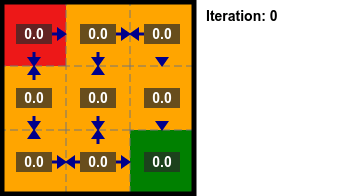

In [26]:
# create a movie from the generated images
# - by default the images will be deleted when the movie is made
# - set "'clear_images': False" to stop them being deleted
movie_name = "policy_evaluation_105.gif"
args = {'movie_name': movie_name, 'clear_images': False }
animate.create_movie(**args)

# show the movie
PyImage(filename=movie_name) 

### Creating a greedy policy from the converged state values

We can take the converged state values, calculated using Policy Evaluation, and act greedily with respect to these values to generate the optimal policy.

In [27]:
# create a greedy policy from the converged state values
policy = Policy(env)
directions = policy.get_directions(values=policy_evaluation.end_values)

In [28]:
# show the optimal policy
info = {'directions': {'arrows':directions,'text':directions}}
env = babyrobot.make("BabyRobot-v0",**setup)
env.show_info(info) 
env.render()

MultiCanvas(height=196, sync_image_data=True, width=346)

### Run Policy Evaluation on the optimal policy

We can now calculate the state values for the new greedy policy. 

In [29]:
policy_evaluation = PolicyEvaluation( env, policy )

# run policy evaluation to convergence
steps_to_convergence = policy_evaluation.run_to_convergence(max_iterations = 300)
print(f"Convergence in {steps_to_convergence} iterations")

# show the final state values after convergence
info = {'text': policy_evaluation.end_values, 'precision': 0}
env = babyrobot.make("BabyRobot-v0",**setup)
env.show_info(info) 
env.render()

Convergence in 3 iterations


MultiCanvas(height=196, sync_image_data=True, width=346)

In [30]:
# helper function to display text information in the side panel
def get_info_string( details ):    
  info = {}  
  info['side_info'] = \
  [
    ((14,110),f"step: {details['step']}"),    
    ((14,130),f"action: {details['action']}"),
    ((14,150),f"new state: {details['new_state']}"),                    
    ((14,170),f"total reward: {details['total_reward']}"),        
  ]    
  return info 

In [31]:
setup = {'show_start_text':False, 'side_panel':{'width':160}, 'add_compass':True}
env = babyrobot.make("BabyRobot-v0",**setup)
info = {'directions': {'arrows':directions,'text':directions}}
env.show_info(info) 
animate = Animate(env)
args = { 'max_steps': 4, 'create_images': True, 'info_function': get_info_string }
animate.show_policy(policy,**args)

### Create and display a movie of the optimal policy.

Creating the movie: optimal_policy.gif (duration = 0.08, steps = 64) - Complete


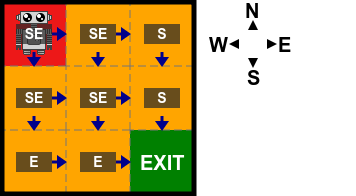

In [32]:
# create a movie from the generated images
movie_name = 'optimal_policy.gif'
args = {'movie_name': movie_name}
animate.create_movie(**args)
PyImage(filename=movie_name)